##### Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from functions import *
from tqdm import tqdm

In this work the activation functions used are ReLu, segmoïd and tanh. 

In the case of Deep Neural Networks, we use the ReLu function mainly to avoid the problem of vanishing gradient. 

# Visualizing the functions

## 0) Function 0

In [8]:
%%latex
\(f_0(x):=x^2\), where \(x\in [-10, 10]\)

<IPython.core.display.Latex object>

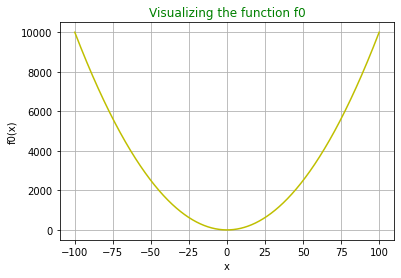

In [9]:
x0=np.linspace(-10**(2), 10**(2), 10**(4))
f0_array= f0(x0)
plt.plot(x0, f0_array, color='y')
plt.xlabel('x')
plt.ylabel('f0(x)')
plt.title('Visualizing the function f0', color='g')
plt. grid()
plt.savefig('figures/f0_plot')
plt.show()

## 1) Function 1

In [10]:
%%latex
\(f_1(x):=xx-yy\), where \((x,y)\in \Re^2\)

<IPython.core.display.Latex object>

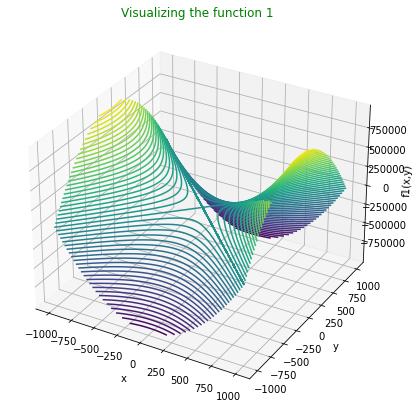

In [11]:
x1=np.linspace(-10**(3), 10**(3), 10**(4))
y1=np.linspace(-10**(3), 10**(3), 10**(4))
X1, Y1 = np.meshgrid(x1, y1)
Z1 = f1(X1, Y1)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X1, Y1, Z1, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('Visualizing the function 1', color='g')
plt.savefig('figures/f1_plot')
plt.show()

## 2) Function 2

In [12]:
%%latex
\(f_2(x,y):=xye^{-(xx+yy)}\),  where \((x,y)\in [-4, 4]\)

<IPython.core.display.Latex object>

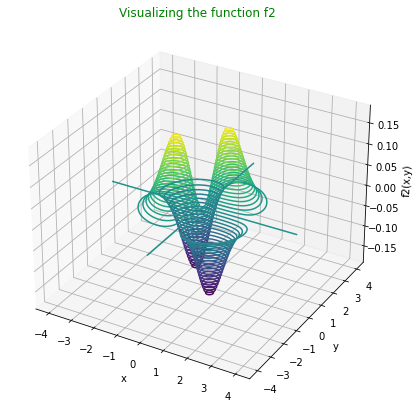

In [13]:
x2=np.linspace(-4, 4, 10**(4))
y2=np.linspace(-4, 4, 10**(4))
X2, Y2 = np.meshgrid(x2, y2)
Z2 = f2(X2, Y2)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, Z2, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f2(x,y)')
ax.set_title('Visualizing the function f2', color='g')
plt.savefig('figures/f2_plot')
plt.show()

## 3) Function 3

In [14]:
%%latex
\(f_3(x):=sin(x)\) where \(x\in \Re\)

<IPython.core.display.Latex object>

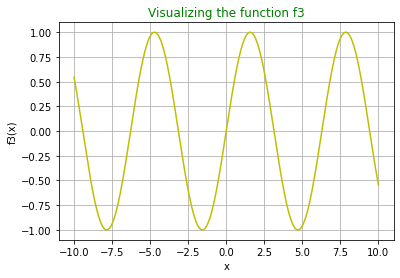

In [15]:
x3=np.linspace(-10**(1), 10**(1), 10**(4))
f3_array= f3(x3)
plt.plot(x3, f3_array, color='y')
plt.xlabel('x')
plt.ylabel('f3(x)')
plt.title('Visualizing the function f3', color='g')
plt. grid()
plt.savefig('figures/f3_plot')
plt.show()

## 4) Function 4

In [16]:
%%latex
\(f_4(x):=e^{-\frac{\vert\vert X-\mathbf{2}_N\vert\vert^2}{2/5}}\) where \(X\in\Re^N\), \(N\in \{10, 50, 100\}\), and \(\mathbf{2}_N\)  is a vector 2's with dimension N.

<IPython.core.display.Latex object>

Regarding this function, it is only visualized in 2d and 3d. For more than 3d the task gets complicated.

#### 2D visualization 

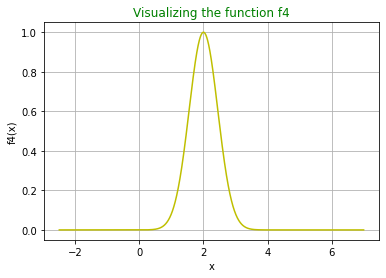

In [17]:
x4=np.linspace(-2.5, 7, 10**(4))
f4_array= f4(x4)
plt.plot(x4, f4_array, color='y')
plt.xlabel('x')
plt.ylabel('f4(x)')
plt.title('Visualizing the function f4', color='g')
plt. grid()
plt.savefig('figures/f4_plot_2D')
plt.show()

#### 3D visualisation 

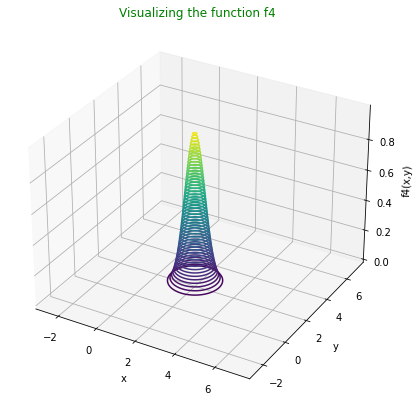

In [18]:
x4=np.linspace(-2.5, 7, 10**(4))
y4=np.linspace(-2.5, 7, 10**(4))
X4, Y4 = np.meshgrid(x4, y4)
Z4 = f4_3D(X4,Y4)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X4, Y4,Z4,  50, cmap='viridis')
#ax.contour3D(X4, Y4,f4(Y4),  50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f4(x,y)')
ax.set_title('Visualizing the function f4', color='g')
plt.savefig('figures/f4_plot_3D')
plt.show()

We can see that our function is indeed a at most 1

In [19]:
Z4.max()

0.9999993873776692

# Function Approximation

Now that we have visualized our function, we proceed with the approximation using Neural Networks.

## Toy example, f0

First, we start with f0 which is a relatively simple function to approximate. It's expression is reminded below.

In [20]:
%%latex
\(f_0(x):=x^2\), where \(x\in [-10, 10]\)

<IPython.core.display.Latex object>

### Simple NN

#### Our NN's architechture

We will try to approximate f0 using 1 layer with 4 neurons. 

In [21]:
class NN0_0(nn.Module):
    def __init__(self, input_features=1, h1=4):
        super().__init__()
        self.layer1=nn.Linear(input_features, h1)
        self.output=nn.Linear(h1,1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x=self.output(x)
        return x

#### Creating our Model

In [22]:
torch.manual_seed(123)
model_0_f0=NN0_0()

#### Importing our data

In [23]:
Data_f0=pd.read_csv('./datasets/f0_dataset.csv')
Data_f0.head()

,Unnamed: 0,x,f0(x)
0,0,-10.000000,100.000000
1,1,-9.797980,96.000408
2,2,-9.595960,92.082441
3,3,-9.393939,88.246097
4,4,-9.191919,84.491378


#### Loading the data

In [24]:
Input_data_0=Data_f0['x'].to_numpy()
f0_data=Data_f0['f0(x)'].to_numpy()

Input_train and Input_test represent the variable x, respectively for training and testing. While f0_train and f0_test are the labels for respectively the training and testing.

In [25]:
Input_train_0, Input_test_0,f0_train ,f0_test = train_test_split(Input_data_0, f0_data , test_size=0.33, random_state=42)

Transform our feautures an labels into Tensors 

In [26]:
Input_data_0=torch.FloatTensor(Input_data_0).reshape(-1,1)
f0_data=torch.FloatTensor(f0_data).reshape(-1,1)

Input_train_0=torch.FloatTensor(Input_train_0).reshape(-1,1)
f0_train=torch.FloatTensor(f0_train).reshape(-1,1)

Input_test_0=torch.FloatTensor(Input_test_0).reshape(-1,1)
f0_test=torch.FloatTensor(f0_test).reshape(-1,1)

#### Criterion and optimizer

Our criterion is the loss function. And the optimizer is the cost function. 

In [27]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_0_f0.parameters(), lr=10**(-1))

#### Fitting our NN

In [28]:

epochs = 200
loss_array_0=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_0_f0(Input_data_0)

    # compute the loss
    loss = criterion(output, f0_data)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_array_0+=[loss.item()]


100%|██████████| 200/200 [00:00<00:00, 3295.87it/s]


### Visualizing results

#### Loss vs epochs

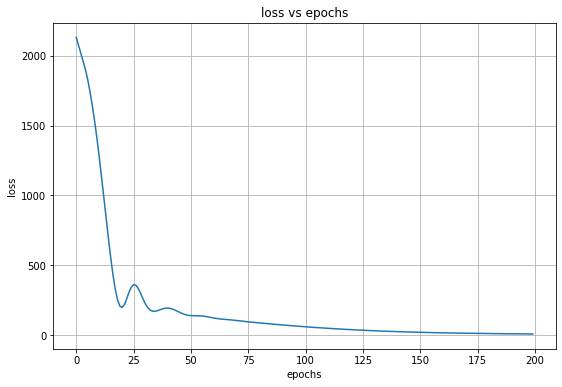

In [29]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_array_0)), loss_array_0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f0_1')
plt.show()


#### Approximation vs true function 

In [30]:
with torch.no_grad():
    f0_approx =[]
    for i in Input_data_0:

        f0_approx.append(model_0_f0.forward(i).item())


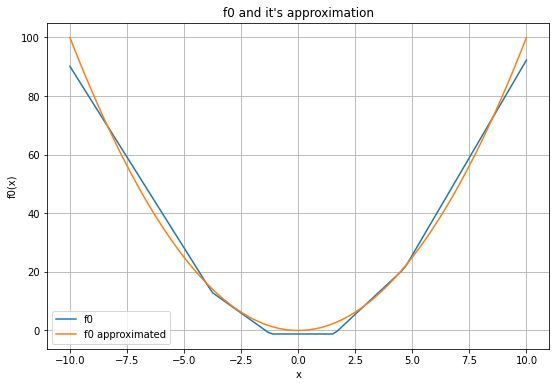

In [31]:
plt.figure(figsize=[9,6])
plt.plot(Input_data_0, f0_approx, label='f0')
plt.plot(Input_data_0, f0_data.reshape(len(Input_data_0), -1), label='f0 approximated')
plt.xlabel('x')
plt.ylabel('f0(x)')
plt.title('f0 and it\'s approximation')
plt.legend()
plt.grid()
plt.savefig('./figures/f0_approximation_1')
plt.show()


## F1 approximation

In this section our goal is to compare Deep and Shallow architectures for several type of NNs.

In [32]:
%%latex
\(f_1(x):=xx-yy\), where \((x,y)\in \Re^2\)

<IPython.core.display.Latex object>

### Feedforward Neural Network

#### the Data

##### Importing the data

In [33]:
Data_f1=pd.read_csv('./datasets/f1_dataset.csv')
Data_f1.head()

,Unnamed: 0,x,y,"f1(x,y)"
0,0,60.296030,55.715572,531.386272
1,1,-7.510751,39.793979,-1527.149415
2,2,-95.639564,-37.973797,7704.916906
3,3,-77.677768,18.811881,5679.948733
4,4,-21.572157,50.615062,-2096.526484


##### Loading the data

Splitting the data

In [34]:
Input_data_1=Data_f1[['x', 'y']].to_numpy()
f1_data=Data_f1['f1(x,y)'].to_numpy()

In [35]:
Input_train_1, Input_test_1,f1_train ,f1_test = train_test_split(Input_data_1, f1_data , test_size=0.33, random_state=42)

Transforming data to Tensors

In [36]:
Input_data_1=torch.FloatTensor(Input_data_1).reshape(-1,2)
f1_data=torch.FloatTensor(f1_data).reshape(-1,1)

Input_train_1=torch.FloatTensor(Input_train_1).reshape(-1,2)
f1_train=torch.FloatTensor(f1_train).reshape(-1,1)

Input_test_1=torch.FloatTensor(Input_test_1).reshape(-1,2)
f1_test=torch.FloatTensor(f1_test).reshape(-1,1)

#### Deep model using ReLu

We have three architectures. The first one has 5 layers, the second one has 7 layers and the third one has 10 layers. 

We define a commun learning rate (lr). And commun epochs.

In [1291]:
lr=10**(-2)
epochs = 500

##### Architecture 1

In this architecture, we have 4 hidden layer. Each having 10 neurons. And, we use the ReLu activation function for all the layer.

In [1292]:
class NN1_F_D_1_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)
        self.layer2=nn.Linear(10, 10)
        self.layer3=nn.Linear(10, 10)
        self.layer4=nn.Linear(10, 10)
        self.layer5=nn.Linear(10, 10)
        
        self.output=nn.Linear(10,1)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x=self.output(x)
        return x

##### Creating the model 1

In [1293]:

model_f1_F_D_1_ReLu=NN1_F_D_1_ReLu()

##### Criterion and the optimizer 1

In [1294]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adagrad(model_f1_F_D_1_ReLu.parameters(), lr=lr)

##### Training the model 1

In [1295]:
loss_f1_F_D_1_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_1_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_1_ReLu+=[loss.item()]

100%|██████████| 500/500 [00:01<00:00, 359.97it/s]


##### Visualizing the results of model 1

Loss vs epochs

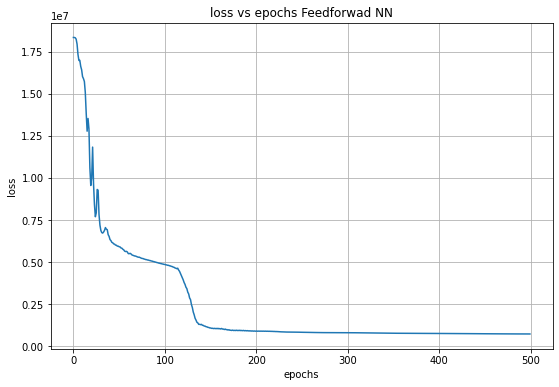

In [1296]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_1_D')
plt.show()


In [1297]:
loss_f1_F_D_1_ReLu[0]/loss_f1_F_D_1_ReLu[-1]

25.242548678709383

The loss has decreased by a facto of 68

 Approximation vs true function 

Visualising the training

In [1298]:
###

Visualizing the test

In [1299]:
###

In [1300]:
###

Accuracy 

In [1301]:
###

##### Architecture 2

In this architecture, we have 5 hidden layers. Each has 10 neurons.

In [1302]:
class NN1_F_D_2_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)

        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        self.layer4 = nn.Linear(10,10)
        self.layer5 = nn.Linear(10,10)
        self.layer6 = nn.Linear(10,10)
       
        

        self.output=nn.Linear(10,1)

    def forward(self, x):

        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))

        x=self.output(x)
        
        return x

##### Creating the model 2

In [1303]:
model_f1_F_D_2_ReLu=NN1_F_D_2_ReLu()

##### Criterion the model 2

In [1304]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adagrad(model_f1_F_D_2_ReLu.parameters(), lr=lr)

##### Training the model 2

In [1305]:

loss_f1_F_D_2_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_2_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_2_ReLu+=[loss.item()]

100%|██████████| 500/500 [00:01<00:00, 308.65it/s]


##### Visualisation of the results of model 2

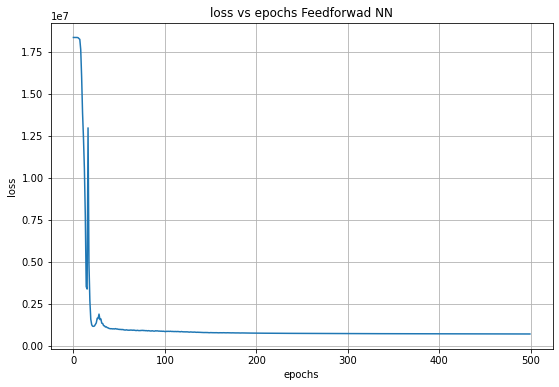

In [1306]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_2_D')
plt.show()

##### Architecture 3

In this architecture, we have 7 hidden layers. Each has 10 neurons. 

In [1307]:
class NN1_F_D_3_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)

        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        self.layer4 = nn.Linear(10,10)
        self.layer5 = nn.Linear(10,10)
        self.layer6 = nn.Linear(10,10)
        self.layer7 = nn.Linear(10,10)
        self.layer8 = nn.Linear(10,10)
        

        self.output=nn.Linear(10,1)

    def forward(self, x):

        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.relu(self.layer7(x))
        x = F.relu(self.layer8(x))

        x=self.output(x)
        
        return x

##### Creating the model 3

In [1308]:
model_f1_F_D_3_ReLu=NN1_F_D_3_ReLu()

##### Criterion and the optimizer 3

In [1309]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adagrad(model_f1_F_D_3_ReLu.parameters(), lr=lr)

##### Training the model 3

In [1310]:

loss_f1_F_D_3_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_3_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_3_ReLu+=[loss.item()]

100%|██████████| 500/500 [00:02<00:00, 234.79it/s]


##### Visualization of results of model 3 

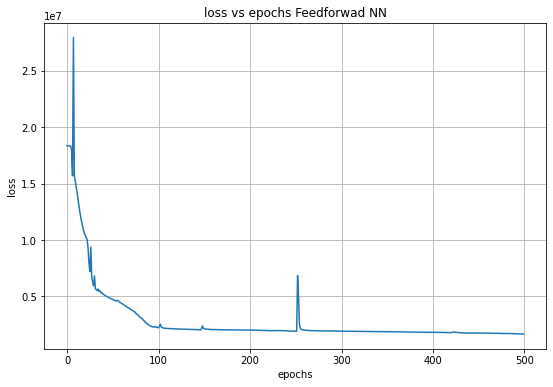

In [1311]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_3_D')
plt.show()

##### Architecture 4

In this architecture, we have 10 hidden layers. Each has 10 neurons. 

In [1312]:
class NN1_F_D_4_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)

        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        self.layer4 = nn.Linear(10,10)
        self.layer5 = nn.Linear(10,10)
        self.layer6 = nn.Linear(10,10)
        self.layer7 = nn.Linear(10,10)
        self.layer8 = nn.Linear(10,10)
        self.layer9 = nn.Linear(10,10)
        self.layer10 = nn.Linear(10,10)
        self.layer11 = nn.Linear(10,10)


        self.output=nn.Linear(10,1)

    def forward(self, x):

        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.relu(self.layer7(x))
        x = F.relu(self.layer8(x))
        x = F.relu(self.layer9(x))
        x = F.relu(self.layer10(x))
        x = F.relu(self.layer11(x))

        x=self.output(x)
        
        return x

##### Creating the model 4

In [1313]:
torch.manual_seed(1234)
model_f1_F_D_4_ReLu=NN1_F_D_4_ReLu()

##### Criterion and optimizer 4

In [1314]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adagrad(model_f1_F_D_4_ReLu.parameters(), lr=lr)

##### Training the model 4

In [1315]:

loss_f1_F_D_4_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_4_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_4_ReLu+=[loss.item()]

100%|██████████| 500/500 [00:02<00:00, 171.30it/s]


##### Visualizing the results of model 3

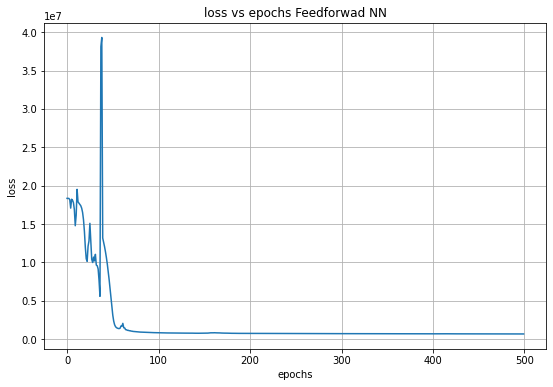

In [1316]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_3_D')
plt.show()

#### Loss vs epochs for the 3 architectures

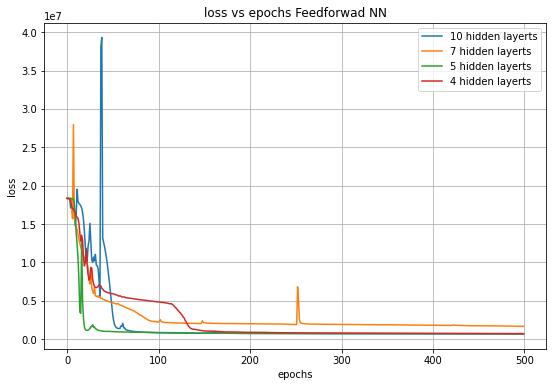

In [1317]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu, label='10 hidden layerts')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu, label='7 hidden layerts')
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu, label='5 hidden layerts')
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu, label='4 hidden layerts')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_D_several_hidden layers')
plt.show()

#### Shallow mode using ReLu

We have three architectures. 

##### The architecture 1

We choose an architecture where we have 2 hidden layer. Each having 50 neurons. And, we use the ReLu activation function for all the layer.

In [1318]:
class NN1_F_S(nn.Module):
    def __init__(self, input_features=2, h1=50, h2=50):
        super().__init__()
        self.layer1=nn.Linear(input_features, h1)
        self.layer2=nn.Linear(h1, h2)
        self.output=nn.Linear(h2,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x=self.output(x)
        return x

##### Creating the model 

In [1319]:
torch.manual_seed(123)
model_1_f1_S=NN1_F_S()

##### Criterion and the optimizer

In [1320]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_1_f1_S.parameters(), lr=10**(-1))

##### Training the model

In [1321]:
epochs = 300
loss_array_1_1_S=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_1_f1_S(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_array_1_1_S+=[loss.item()]

100%|██████████| 300/300 [00:01<00:00, 179.63it/s]


##### Visualizing the results

loss vs epochs

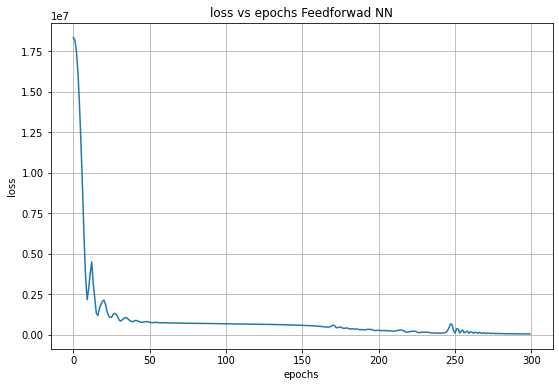

In [1322]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_array_1_1_S)), loss_array_1_1_S)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_1_S')
plt.show()

#### Comparing the Deep model and the shallow model, with ReLu

##### Loss vs epochs

NameError: name 'loss_array_1_1_D' is not defined

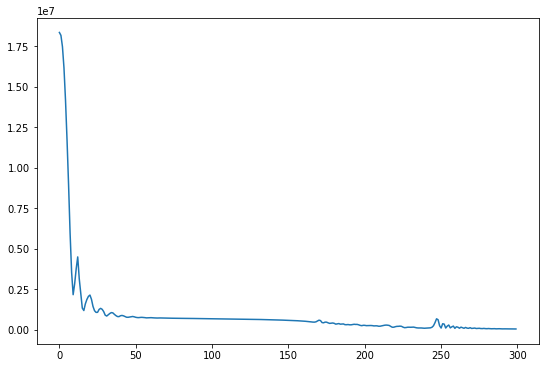

In [1323]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_array_1_1_S)), loss_array_1_1_S, label='Shallow model')
plt.plot(range(len(loss_array_1_1_D)), loss_array_1_1_D, label='Deep model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_1_D_VS_S')
plt.show()

### Quantizing the Feedforward NN

Testing several activation functions and their impact on overflow

## Bonus

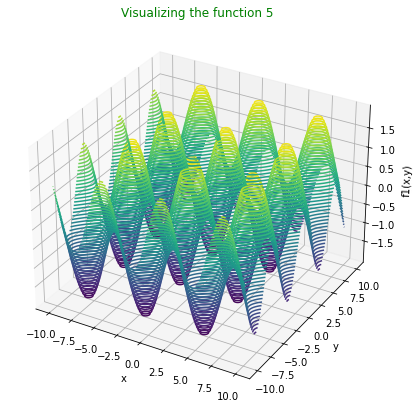